In [15]:
from mpmath import *
mp.prec = 5000
mp.pretty = True

In [16]:
def log1msoftmax(x : list):
    m = max(x)
    x = [i-m for i in x]
    s = sum(exp(i) for i in x)
    res = [log(1-exp(i)/s) for i in x]
    return res

In [17]:
log(exp(-200) + exp(-200))

-199.30685281944005469058276787854182343192449986563974474587931999050660637803030528439413667300358131245799851897942931426631447976424186944296732924836492403806927242917162856480969296137610832652887664988463550204476087952482731842506793484447526586047411704954699290467363335734589576084218504795625956961449919805582935832848135528716003182821545304297372836893545384974279259751836222661036144930473933165886272612627707104350645297423734790114030679803494144523529669320634556745236725504874959393056185289531005349377983227957547547038731205345380683482531860732749589619745374034313085580712839170619682728563221734512243351491432592235154853556005953857739680690326459742555392969190391495251336147686181832324856133252335210911856285801450576848002645119624834138724647083389992894644175012058527049070688610284400179434560712829992781914238974763110786755028610679621560646911225174029828440892911763163724101574108146469756365785632938810763210807627685327678279465983507431272522176554

In [18]:
nprint(log1msoftmax([0,0,0,0,0]), 10)

[-0.2231435513, -0.2231435513, -0.2231435513, -0.2231435513, -0.2231435513]


In [18]:
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(10,20,200)
res = [log1msoftmax([10,10,i])[2] for i in X]



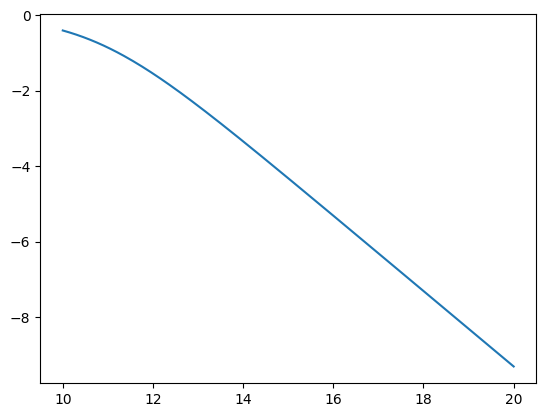

In [19]:
plt.plot(X, res)

In [37]:
log(2)-200

-199.30685281944005469058276787854182343192449986563974474587931999050660637803030528439413667300358131245799851897942931426631447976424186944296732924836492403806927242917162856480969296137610832652887664988463550204476087952482731842506793484447526586047411704954699290467363335734589576084218504795625956961449919805582935832848135528716003182821545304297372836893545384974279259751836222661036144930473933165886272612627707104350645297423734790114030679803494144523529669320634556745236725504874959

In [1]:
import torch

def log1msoftmax(x : torch.Tensor, i : int):
    lse1 = x.logsumexp(-1)
    x = x.clone()
    x[i] = -torch.inf
    lse2 = x.logsumexp(-1)
    return lse2 - lse1

In [2]:
a = torch.tensor([0,0,1000]).bfloat16().requires_grad_()
l = log1msoftmax(a, 2)

In [10]:
import torch

def log1msoftmax(x : torch.Tensor, mask : torch.Tensor, dim : int):
    if dim < 0:
        dim = x.dim() + dim
    
    lse1 = x.logsumexp(dim)

    where = list(torch.where(mask))
    where[dim] = range(x.shape[dim])
    x_of_interest = x[where]
    rng = where.pop(dim)
    lse1_of_interest = lse1[where] if len(where) else lse1
    where.insert(dim, rng)
    mask_of_interest = torch.zeros_like(x_of_interest, dtype=torch.bool)
    mask_of_interest[where] = 1
    x_of_interest[mask_of_interest] = -torch.inf
    lse2_of_interest = x_of_interest.logsumexp(dim)
    return lse2_of_interest - lse1_of_interest

In [12]:
a = torch.tensor([0,0,1000]).bfloat16().requires_grad_()
mask = torch.tensor([1,0,1]).bool()
l = log1msoftmax(a, mask, 0)
l

tensor(-inf, dtype=torch.bfloat16, grad_fn=<SubBackward0>)

In [71]:
list(torch.where(mask))

[tensor([0, 2])]

In [4]:
import torch
a = torch.rand(3,3,4)
a[[0,0,1,1],:,[]].shape

torch.Size([4, 3, 4])

In [35]:
a = torch.tensor([[0,1000,0,0,0], [1,1,1,1,1], [2,2,2,2,2]]).bfloat16().requires_grad_()
dim=1
mask = torch.tensor([[0,1,1,0,0], [0,1,0,1,0], [0,0,0,0,1]]).bool()
where_og = torch.where(mask)
where = list(where_og)
where[dim] = slice(None,None,None)

In [34]:
a[where]

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2.]], dtype=torch.bfloat16, grad_fn=<IndexBackward0>)

In [30]:
a_ = torch.gather(a, dim=1, index=torch.stack(where))

In [38]:
torch.exp(torch.scalar_tensor(-0.2500))

tensor(0.7788)

In [31]:
a_

tensor([[0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.]], dtype=torch.bfloat16, grad_fn=<GatherBackward0>)

In [16]:
where[0].unsqueeze(-1)

tensor([[0],
        [0],
        [1],
        [1],
        [2]])

In [48]:
from log1msoftmax import log1msoftmax

a = torch.tensor([0,0,2000]).double().requires_grad_()
mask = torch.tensor([1,1,1]).bool()
not_nan = log1msoftmax(a, mask, 0)

In [52]:
not_nan

tensor([    0.0000,     0.0000, -1999.3069], dtype=torch.float64,
       grad_fn=<IndexPutBackward0>)

In [51]:
not_nan[1] == 0

tensor(True)

# Error analysis

In [6]:
import torch
from mpmath import *
from log1msoftmax import log1m_softmax
import numpy as np

mp.prec = 2000

def log1msoftmax_pft(x : list):
    m = max(x)
    x = [i-m for i in x]
    s = sum(exp(i) for i in x)
    res = [log(1-exp(i)/s) for i in x]
    return res

def softmax_pft(x : list):
    m = max(x)
    x = [i-m for i in x]
    s = sum(exp(i) for i in x)
    res = [exp(i)/s for i in x]
    return res, s

def grad_log1msoftmax_pft(x : list):
    m = max(x)
    x = [i-m for i in x]
    res = [[0]*len(x) for _ in range(len(x))]
    sm_x, s = softmax_pft(x)
    for i in range(len(x)):
        for j in range(len(x)):
            if i == j:
                res[i][j] = -sm_x[i]
                # res[i][j] = 0
            else:
                t = sm_x[j]*s/(s-exp(x[i]))
                res[i][j] = sm_x[i]*t
                # res[i][j] = 1
    return res

def log1m_softmax_KFrank (X):                           # for one-dimensional tensor X
    xm, im = X.max (0)                                  # largest value in X is the potential problem
    X_bar = X - xm                                      # uniform shift doesn't affect softmax (except numerically)
    lse = X_bar.logsumexp (0)                           # denominator for final result
    sumexp = X_bar.exp().sum() - X_bar.exp()            # sumexp[im] potentially zero
    sumexp[im] = 1.0                                    # protect against log (0)
    log1msm = sumexp.log()                              # good for all but i = im
    X_bar = X_bar.clone()                               # to support backward pass
    X_bar[im] = -float ('inf')                          # "zero out" xm in log space
    log1msm[im] = X_bar.logsumexp (0)                   # replace bad xm term
    log1msm -= lse                                      # final result
    return  log1msm

def max_abs_dist(l1,l2):
    assert len(l1) == len(l2)
    max_error = 0
    for x,y in zip(l1,l2):
        d = abs(x - y)
        if d > max_error:
            max_error = d   
    return max_error

In [31]:
g = grad_log1msoftmax_pft([-1000,-1000,0])
nprint(g)

[[-5.07596e-435, 2.57654e-869, 5.07596e-435], [2.57654e-869, -5.07596e-435, 5.07596e-435], [0.5, 0.5, -1.0]]


## Scenario

We sample a vector from a normal distribution N(0,1) and we multiply it by a coefficient $c$ that will vary from 0 to 100. This creates large gaps between the values of the vector which is the primary source of instabilties when dealing with softmax.

We compute the log(1-softmax(x)) for each of the vectors produced by multiplying by $c$ and we log the difference between the real value of the function and the one computed with the naive approach and the one computed with our approach

The real value of the function is computed using the mpmath package using a ridiculously high precision (500 bits) 

Results are below.

In [20]:
def get_results(v : torch.Tensor, C, func=None):
    perf_naive = []
    perf_ours = []
    perf_KFrank = []
    perf_grad_KFrank = []
    v = v.clone()
    for prog, c in enumerate(C):
        print("%s/%s" % (prog, len(C)))
        v[0] = c
        b = v.clone()
        perfect = log1msoftmax_pft(b.tolist())
        naive = (1-b.softmax(-1)).log().tolist()
        ours = log1m_softmax(b).tolist()

        
        max_grad_error = 0
        pft_grad = grad_log1msoftmax_pft(b.tolist())
        for i in range(len(v)):
            b = v.clone().requires_grad_()
            KFrank = log1m_softmax_KFrank(b)
            KFrank[i].backward()
            maxi = max_abs_dist(pft_grad[i],b.grad.tolist())
            if maxi > max_grad_error:
                max_grad_error = maxi

        perf_naive.append(max_abs_dist(perfect, naive))
        perf_ours.append(max_abs_dist(perfect, ours))
        perf_KFrank.append(max_abs_dist(perfect, KFrank.tolist()))
        perf_grad_KFrank.append(max_grad_error)
    return perf_naive, perf_ours, perf_KFrank, perf_grad_KFrank


In [21]:
a = torch.randn(100)
C = np.linspace(0,200,400)
perf_naive, perf_ours, perf_KFrank, perf_grad_KFrank = get_results(a,C)

0/400
1/400
2/400
3/400
4/400
5/400
6/400
7/400
8/400
9/400
10/400
11/400
12/400
13/400
14/400
15/400
16/400
17/400
18/400
19/400
20/400
21/400
22/400
23/400
24/400
25/400
26/400
27/400
28/400
29/400
30/400
31/400
32/400
33/400
34/400
35/400
36/400
37/400
38/400
39/400
40/400
41/400
42/400
43/400
44/400
45/400
46/400
47/400
48/400
49/400
50/400
51/400
52/400
53/400
54/400
55/400
56/400
57/400
58/400
59/400
60/400
61/400
62/400
63/400
64/400
65/400
66/400
67/400
68/400
69/400
70/400
71/400
72/400
73/400
74/400
75/400
76/400
77/400
78/400
79/400
80/400
81/400
82/400
83/400
84/400
85/400
86/400
87/400
88/400
89/400
90/400
91/400
92/400
93/400
94/400
95/400
96/400
97/400
98/400
99/400
100/400
101/400
102/400
103/400
104/400
105/400
106/400
107/400
108/400
109/400
110/400
111/400
112/400
113/400
114/400
115/400
116/400
117/400
118/400
119/400
120/400
121/400
122/400
123/400
124/400
125/400
126/400
127/400
128/400
129/400
130/400
131/400
132/400
133/400
134/400
135/400
136/400
137/400
138/40

### Stability of our function vs. naive one

Maximum MAE (ours) = 6.561922861487168616e-6
Maximum MAE (KFrank) = 6.561922861487168616e-6


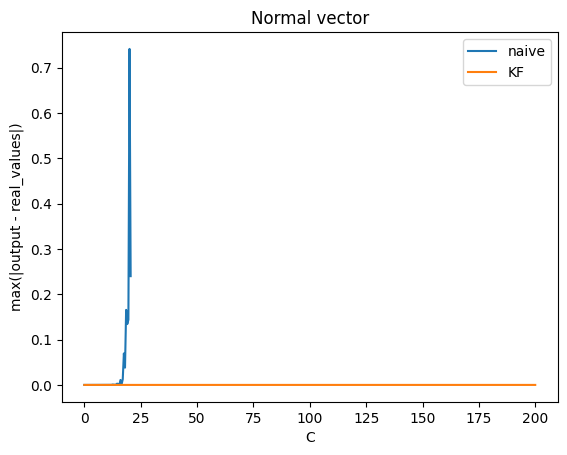

In [27]:
import matplotlib.pyplot as plt

plt.plot(C, perf_naive, label='naive')
# plt.plot(C, perf_ours, label='ours')
plt.plot(C, perf_KFrank, label='KF')
plt.legend()
plt.xlabel('C')
plt.ylabel('max(|output - real_values|)')
plt.title('Normal vector')

print("Maximum MAE (ours) = %s" % nstr(max(perf_ours), 20))
print("Maximum MAE (KFrank) = %s" % nstr(max(perf_KFrank), 20))

Maximum MAE on gradient (KFrank) = 6.794929504e-6


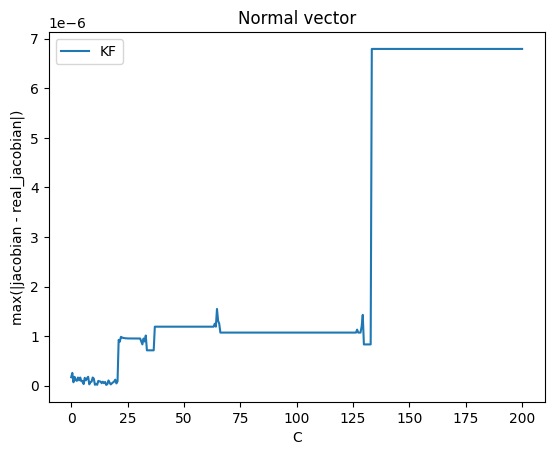

In [30]:
# plt.plot(C, perf_ours, label='ours')
plt.plot(C, perf_grad_KFrank, label='KF')
plt.legend()
plt.xlabel('C')
plt.ylabel('max(|jacobian - real_jacobian|)')
plt.title('Normal vector')

print("Maximum MAE on gradient (KFrank) = %s" % nstr(max(perf_grad_KFrank), 10))

In [24]:
log1m_softmax_KFrank(torch.tensor([-1000,-1000,2]).float())

tensor([    0.0000,     0.0000, -1001.3068])

As $c$ approaches large values, the naive function starts to diverge from the real values until it break down completely and outputs infinite values

On the other hand, our function stays stable when the values are close ($c \approx 0$) and also when values divege greatly ($c >> 0$)

### Stability near zero

Text(0.5, 1.0, 'Normal vector near 0')

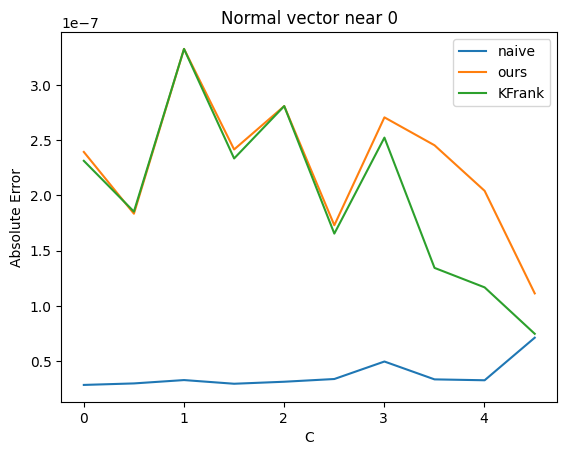

In [64]:
n = 10
plt.plot(C[:n], perf_naive[:n], label='naive')
plt.plot(C[:n], perf_ours[:n], label='ours')
plt.plot(C[:n], perf_KFrank[:n], label='KFrank')
plt.legend()
plt.xlabel('C')
plt.ylabel('Absolute Error')
plt.title('Normal vector near 0')

## Other scenarios

We repeat the same experiments but we sample the vector from Uniform(-1,0) and from Uniform(0,1) to test large gaps but on the positive and negative sides exclusively.

In [23]:
a = torch.rand(100) + 0.5

Maximum MAE = 2.8748987445024397127e-7


Text(0.5, 1.0, 'Exp. Uniform positive vector near 0')

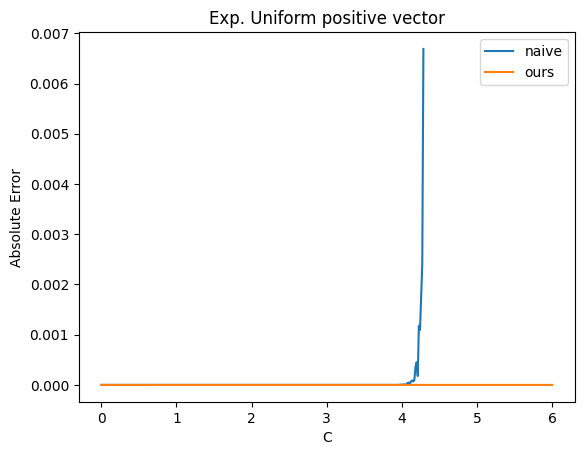

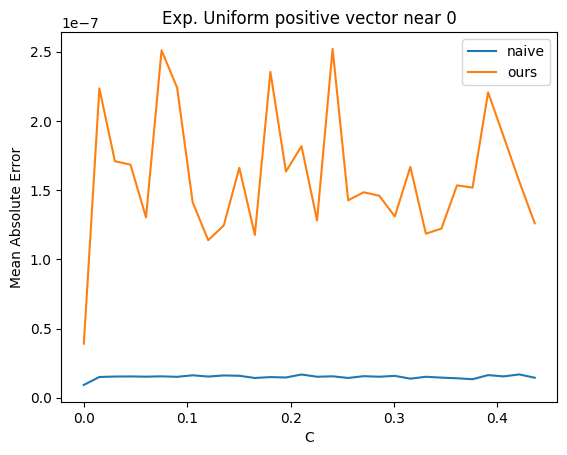

In [25]:
C = np.linspace(0,6,400)

perf_naive, perf_ours = get_results(a,C,func=torch.exp)
print("Maximum MAE = %s" % nstr(max(perf_ours), 20))

plt.figure()
plt.plot(C, perf_naive, label='naive')
plt.plot(C, perf_ours, label='ours')
plt.legend()
plt.xlabel('C')
plt.ylabel('Absolute Error')
plt.title('Exp. Uniform positive vector')

plt.figure()
n = 30
plt.plot(C[:n], perf_naive[:n], label='naive')
plt.plot(C[:n], perf_ours[:n], label='ours')
plt.legend()
plt.xlabel('C')
plt.ylabel('Mean Absolute Error')
plt.title('Exp. Uniform positive vector near 0')

Maximum MAE = 2.6632962984688363138e-7


Text(0.5, 1.0, 'Exp. Uniform negative vector near 0')

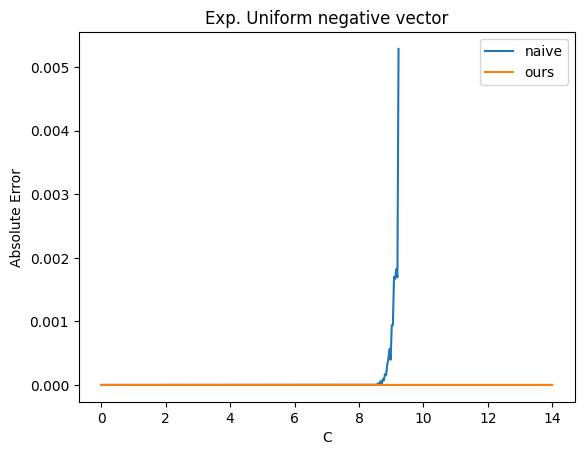

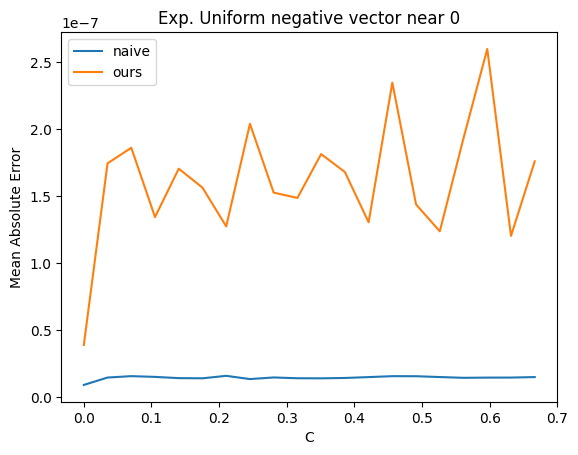

In [27]:
C = np.linspace(0,14,400)
f = lambda x : -torch.exp(x)
perf_naive, perf_ours = get_results(a,C,f)
print("Maximum MAE = %s" % nstr(max(perf_ours), 20))

plt.figure()
plt.plot(C, perf_naive, label='naive')
plt.plot(C, perf_ours, label='ours')
plt.legend()
plt.xlabel('C')
plt.ylabel('Absolute Error')
plt.title('Exp. Uniform negative vector')

plt.figure()
n = 20
plt.plot(C[:n], perf_naive[:n], label='naive')
plt.plot(C[:n], perf_ours[:n], label='ours')
plt.legend()
plt.xlabel('C')
plt.ylabel('Mean Absolute Error')
plt.title('Exp. Uniform negative vector near 0')

The naive is more stable in this scenario but the values predicted by our approach is off by errors of magnitude $10^{-7}$ or smaller which is completely negligeable

**Conclusion**: It seems that our approach is as good as the naive approach while solving the numerical instability that arises with large gaps in the values of $x$ in $log(1-softmax(x))$ 

# Derivative of log(1-softmax)

In [54]:
from sympy import *
init_printing(fontsize=100)
a,b,c,d,e,f,g,h = symbols("a,b,c,d,e,f,g,h")
a1 = Array([a,b,c])

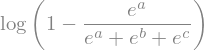

In [55]:
softmax_a = exp(a1[0]) / sum(exp(x) for x in a1)
log1m_softmax_a = log(1- softmax_a)
log1m_softmax_a

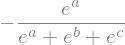

In [56]:
div = simplify(diff(log1m_softmax_a, a))
div

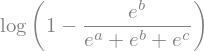

In [57]:
softmax_b = exp(a1[1]) / sum(exp(x) for x in a1)
log1m_softmax_b = log(1- softmax_b)
log1m_softmax_b

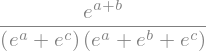

In [58]:
div = simplify(diff(log1m_softmax_b, a))
div

In [47]:
div.subs([('a', 2), ('b', -1000), ('c', -1000)]).evalf()

In [49]:
-softmax_a.subs([('a', 2), ('b', -1000), ('c', -1000)]).evalf()

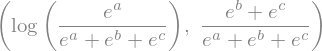

In [51]:
log_softmax_a = log(softmax_a)
div_log_softmax_a = simplify(diff(log_softmax_a, a))
log_softmax_a, div_log_softmax_a